In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [3]:
df_train=pd.read_csv('./06_data/kc_houseprice_train.csv')
df_test=pd.read_csv('./06_data/kc_houseprice_test.csv')

In [4]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,114101516,20140528T000000,310000.0,3,1.0,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
1,9297300055,20150124T000000,650000.0,4,3.0,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
2,1202000200,20141103T000000,233000.0,3,2.0,1710,4697,1.5,0,0,...,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
3,8562750320,20141110T000000,580500.0,3,2.5,2320,3980,2.0,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
4,7589200193,20141110T000000,535000.0,3,1.0,1090,3000,1.5,0,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17384 non-null  int64  
 1   date           17384 non-null  object 
 2   price          17384 non-null  float64
 3   bedrooms       17384 non-null  int64  
 4   bathrooms      17384 non-null  float64
 5   sqft_living    17384 non-null  int64  
 6   sqft_lot       17384 non-null  int64  
 7   floors         17384 non-null  float64
 8   waterfront     17384 non-null  int64  
 9   view           17384 non-null  int64  
 10  condition      17384 non-null  int64  
 11  grade          17384 non-null  int64  
 12  sqft_above     17384 non-null  int64  
 13  sqft_basement  17384 non-null  int64  
 14  yr_built       17384 non-null  int64  
 15  yr_renovated   17384 non-null  int64  
 16  zipcode        17384 non-null  int64  
 17  lat            17384 non-null  float64
 18  long  

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4229 non-null   int64  
 1   date           4229 non-null   object 
 2   price          4229 non-null   float64
 3   bedrooms       4229 non-null   int64  
 4   bathrooms      4229 non-null   float64
 5   sqft_living    4229 non-null   int64  
 6   sqft_lot       4229 non-null   int64  
 7   floors         4229 non-null   float64
 8   waterfront     4229 non-null   int64  
 9   view           4229 non-null   int64  
 10  condition      4229 non-null   int64  
 11  grade          4229 non-null   int64  
 12  sqft_above     4229 non-null   int64  
 13  sqft_basement  4229 non-null   int64  
 14  yr_built       4229 non-null   int64  
 15  yr_renovated   4229 non-null   int64  
 16  zipcode        4229 non-null   int64  
 17  lat            4229 non-null   float64
 18  long    

In [8]:
X_many_features=df_train.drop(axis=1,columns=['price'])
X_train=pd.DataFrame(X_many_features['sqft_living'])
Y_train=pd.DataFrame(df_train['price'])

In [9]:
X_many_features=df_test.drop(axis=1,columns=['price'])
X_test=pd.DataFrame(X_many_features['sqft_living'])
Y_test=pd.DataFrame(df_test['price'])

In [10]:
X_train

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
17379,3510
17380,1310
17381,1530
17382,1600


In [11]:
X_train=list(X_train['sqft_living'])
Y_train=list(Y_train['price'])
X_test=list(X_test['sqft_living'])
Y_test=list(Y_test['price'])

In [12]:
print(len(X_test))
print(len(Y_test))

4229
4229


/home/yashprime1/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

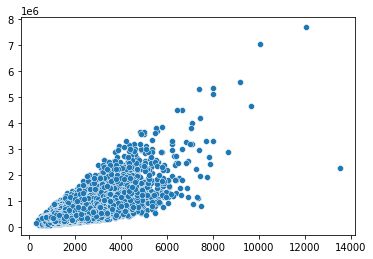

In [13]:
sns.scatterplot(X_train,Y_train)

In [14]:
# 1 Nearest Neighbor regression for single feature 
def NN_1(X_query,X_train):
    # Initialization
    NN_1_distance=math.inf
    NN_1_x = -1
    # Finding Nearest Neighbor by Euclidean Distance
    for i in range(len(X_train)):
        distance = abs(X_query - X_train[i])
        if distance < NN_1_distance:
            NN_1_distance = distance
            NN_1_x = i
    return Y_train[NN_1_x]



In [15]:
Y_predicted=[]
for i in range(len(X_test)):
    Y_predicted.append(NN_1(X_test[i],X_train))

<AxesSubplot:>

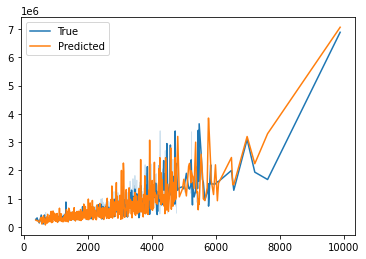

In [17]:
sns.lineplot(x=X_test,y=Y_test, label='True')
sns.lineplot(x=X_test,y=Y_predicted, label = 'Predicted')